In [2]:
import spacy
import pandas
from tabulate import tabulate

def pbool(x):
    return '+' if x else '-'

def entity_at(t):
    #print(t.i, t.idx, dir(t))
    entity = [e for e in t.doc.ents if e.start == t.i]
    if entity:
        return "{}: {}".format(t.ent_type_, entity[0].text)
    return ''

def print_tokens(nlp, doc):
    for s in doc.sents:
        print('Sentence: "{}"'.format(s))
        df = pandas.DataFrame(columns=['Shape', 'Vocab', 'POS', 'Text', 'Lemma', 'Entity', 'Dep', 'Head'], 
                             data=[(t.shape_, pbool(t.orth_ in nlp.vocab), t.pos_,
                                    t.text, t.lemma_, entity_at(t), t.dep_, t.head) for t in s])
        # print(tabulate(df, showindex=False, headers=df.columns))
        display(df)

sample_sentences = "Привет Миру! Как твои дела? Сегодня неплохая погода."

nlp = spacy.load('/pi/ru2')
nlp.add_pipe(nlp.create_pipe('sentencizer'), first=True)
print("Pipeline: {}".format(nlp.pipe_names))
doc = nlp(sample_sentences)
print("Sample sentences: {}".format(sample_sentences))
print("\nResults work of ru2: ")
print_tokens(nlp, doc)
print('\n{}\nUse  lemmatizer and POS from pymorphy2'.format('='*20))

Pipeline: ['sentencizer', 'tagger', 'parser']
Sample sentences: Привет Миру! Как твои дела? Сегодня неплохая погода.

Results work of ru2: 
Sentence: "Привет Миру!"


,Shape,Vocab,POS,Text,Lemma,Entity,Dep,Head
0,Xxxxx,-,NOUN,Привет,привет,,ROOT,Привет
1,Xxxx,+,PROPN,Миру,миру,,appos,Привет
2,!,+,PUNCT,!,!,,punct,Привет


Sentence: "Как твои дела?"


,Shape,Vocab,POS,Text,Lemma,Entity,Dep,Head
0,Xxx,+,ADV,Как,как,,mark,дела
1,xxxx,+,DET,твои,твой,,det,дела
2,xxxx,+,NOUN,дела,дело,,ROOT,дела
3,?,+,PUNCT,?,?,,punct,дела


Sentence: "Сегодня неплохая погода."


,Shape,Vocab,POS,Text,Lemma,Entity,Dep,Head
0,Xxxxx,+,ADV,Сегодня,сегодня,,advmod,погода
1,xxxx,+,ADJ,неплохая,неплохой,,amod,погода
2,xxxx,+,NOUN,погода,погода,,ROOT,погода
3,.,+,PUNCT,.,.,,punct,погода



Use  lemmatizer and POS from pymorphy2


index: 1	text: Сегодня 	lemma: сегодня	upos: ADV	xpos: ADV__Degree=Pos
index: 2	text: неплохая 	lemma: неплохой	upos: ADJ	xpos: ADJ__Case=Nom|Degree=Pos|Gender=Fem|Number=Sing
index: 3	text: погода 	lemma: погода	upos: NOUN	xpos: NOUN__Animacy=Inan|Case=Nom|Gender=Fem|Number=Sing
index: 4	text: . 	lemma: .	upos: PUNCT	xpos: PUNCT___
Сегодня -> advmod, 3, погода
неплохая -> amod, 3, погода
погода -> root, 0, _root_
. -> punct, 3, погода
('Сегодня', 3, 'advmod')
('неплохая', 3, 'amod')
('погода', 0, 'root')
('.', 3, 'punct')


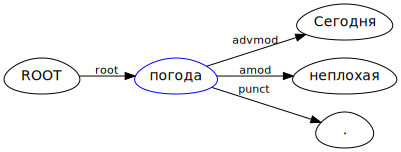

In [9]:
from sagas.nlu.uni_impl_spacy import SpacyParserImpl
from sagas.nlu.uni_viz import EnhancedViz

def viz_spacy(sents, lang='ru'):
    doc=SpacyParserImpl(lang)(sents)
    cv = EnhancedViz(shape='egg', size='8,5', fontsize=20)
    return cv.analyse_doc(doc, None)

viz_spacy("Сегодня неплохая погода.")

In [4]:
nlp = spacy.load('/pi/ru2', disable=['tagger', 'parser', 'NER'])
nlp.add_pipe(nlp.create_pipe('sentencizer'), first=True)
doc = nlp(sample_sentences)
print("\nResults work: ")
print_tokens(nlp, doc)


Results work: 
Sentence: "Привет Миру!"


,Shape,Vocab,POS,Text,Lemma,Entity,Dep,Head
0,Xxxxx,-,,Привет,Привет,,,Привет
1,Xxxx,+,,Миру,Миру,,,Миру
2,!,+,,!,!,,,!


Sentence: "Как твои дела?"


,Shape,Vocab,POS,Text,Lemma,Entity,Dep,Head
0,Xxx,+,,Как,Как,,,Как
1,xxxx,+,,твои,твои,,,твои
2,xxxx,+,,дела,дела,,,дела
3,?,+,,?,?,,,?


Sentence: "Сегодня неплохая погода."


,Shape,Vocab,POS,Text,Lemma,Entity,Dep,Head
0,Xxxxx,+,,Сегодня,сегодня,,,Сегодня
1,xxxx,+,,неплохая,неплохой,,,неплохая
2,xxxx,+,,погода,погода,,,погода
3,.,+,,.,.,,,.


index: 1	text: Как 	lemma: как	upos: SCONJ	xpos: SCONJ___
index: 2	text: твои 	lemma: твой	upos: DET	xpos: DET__Case=Nom|Number=Plur
index: 3	text: дела 	lemma: дело	upos: NOUN	xpos: NOUN__Animacy=Inan|Case=Nom|Gender=Neut|Number=Plur
index: 4	text: ? 	lemma: ?	upos: PUNCT	xpos: PUNCT___
Как -> mark, 3, дела
твои -> det, 3, дела
дела -> root, 0, _root_
? -> punct, 3, дела
('Как', 3, 'mark')
('твои', 3, 'det')
('дела', 0, 'root')
('?', 3, 'punct')


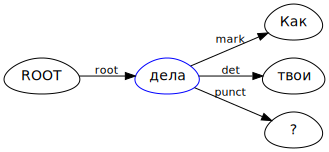

In [10]:
viz_spacy("Как твои дела?")